In [178]:
import pandas as pd
import numpy as np


In [75]:
df = pd.read_csv('Aircraft_Incident_Dataset.csv')


In [76]:
df.head()

,Incident_Date,Aircaft_Model,Aircaft_Registration,Aircaft_Operator,Aircaft_Nature,Incident_Category,Incident_Cause(es),Incident_Location,Aircaft_Damage_Type,Date,Time,Arit,Aircaft_Engines,Onboard_Crew,Onboard_Passengers,Onboard_Total,Fatalities,Aircaft_First_Flight,Aircraft_Phase,Departure_Airport,Destination_Airport,Ground_Casualties,Collision_Casualties
0,03-JAN-2022,British Aerospace 4121 Jetstream 41,ZS-NRJ,SA Airlink,Domestic Non Scheduled Passenger,Accident | repairable-damage,"Airplane - Engines, Airplane - Engines - Prop/...",near Venetia Mine...,Substantial,Monday 3 January 2022,08:10,03-JAN-2022,2 Garrett TPE331-14GR-805H,Fatalities: 0 / Occupants: 3,Fatalities: 0 / Occupants: 4,Fatalities: 0 / Occupants: 7,0,1995-05-19 (26 years 8 months),Landing (LDG),Johannesburg-O.R. Tambo International Airport ...,"Venetia Mine Airport (FAVM) , South Africa",NaN,NaN
1,04-JAN-2022,British Aerospace 3101 Jetstream 31,HR-AYY,LANHSA,Domestic Scheduled Passenger,Accident | repairable-damage,"Airplane - Undercarriage, Airplane - Undercarr...",Roatán-Juan ...,Substantial,Tuesday 4 January 2022,ca 12:00,04-JAN-2022,NaN,Fatalities: 0 / Occupants:,Fatalities: 0 / Occupants:,Fatalities: 0 / Occupants: 19,0,1985,Landing (LDG),La Ceiba-Goloson International Airport (LCE/MH...,Roatán-Juan Manuel Gálvez International Airpor...,NaN,NaN
2,05-JAN-2022,Boeing 737-4H6,EP-CAP,Caspian Airlines,Domestic Scheduled Passenger,Accident | repairable-damage,"Airplane - Undercarriage, Airplane - Undercarr...",Isfahan-Shah...,Substantial,Wednesday 5 January 2022,17:07,05-JAN-2022,2 CFMI CFM56-3C1,Fatalities: 0 / Occupants:,Fatalities: 0 / Occupants:,Fatalities: 0 / Occupants: 116,0,1992-09-18 (29 years 4 months),Landing (LDG),"Mashhad Airport (MHD/OIMM) , Iran","Isfahan-Shahid Beheshti Airport (IFN/OIFM) , Iran",NaN,NaN
3,08-JAN-2022,Tupolev Tu-204-100C,RA-64032,"Cainiao, opb Aviastar-TU",Cargo,Accident | hull-loss,"Cargo - Fire/smoke, Result - Damaged on the gr...",Hangzhou-Xia...,Destroyed,Saturday 8 January 2022,04:40,08-JAN-2022,2 Soloviev PS-90A,Fatalities: 0 / Occupants: 8,Fatalities: 0 / Occupants: 0,Fatalities: 0 / Occupants: 8,0,2002-07-18 (19 years 6 months),Standing (STD),Hangzhou-Xiaoshan International Airport (HGH/Z...,"Novosibirsk-Tolmachevo Airport (OVB/UNNT) , Ru...",NaN,NaN
4,12-JAN-2022,Beechcraft 200 Super King Air,NaN,private,Illegal Flight,"Criminal occurrence (sabotage, shoot down) | h...",Result - Damaged on the ground,"Machakilha, ...",Damaged beyond repair,Wednesday 12 January 2022,c. 02:00,12-JAN-2022,NaN,Fatalities: 0 / Occupants: 0,Fatalities: 0 / Occupants: 0,Fatalities: 0 / Occupants: 0,0,NaN,Standing (STD),?,?,NaN,NaN


In [77]:
df['Aircaft_Damage_Type'].unique()

array(['Substantial', 'Destroyed', 'Damaged beyond repair', 'Unknown',
       nan, 'Minor', 'Missing'], dtype=object)

In [78]:
df['Aircaft_Damage_Type'].count()

22751

In [79]:
df.isnull().sum()

Incident_Date               0
Aircaft_Model               0
Aircaft_Registration     1561
Aircaft_Operator            0
Aircaft_Nature              0
Incident_Category           0
Incident_Cause(es)          0
Incident_Location         932
Aircaft_Damage_Type       768
Date                        0
Time                    14316
Arit                        0
Aircaft_Engines         12883
Onboard_Crew                0
Onboard_Passengers          0
Onboard_Total               0
Fatalities                  0
Aircaft_First_Flight     5488
Aircraft_Phase              0
Departure_Airport           0
Destination_Airport         0
Ground_Casualties       23172
Collision_Casualties    23227
dtype: int64

In [80]:
drop = df.drop(columns=['Ground_Casualties','Collision_Casualties'])

In [81]:
drop.columns.to_list()

['Incident_Date',
 'Aircaft_Model',
 'Aircaft_Registration',
 'Aircaft_Operator',
 'Aircaft_Nature',
 'Incident_Category',
 'Incident_Cause(es)',
 'Incident_Location',
 'Aircaft_Damage_Type',
 'Date',
 'Time',
 'Arit',
 'Aircaft_Engines',
 'Onboard_Crew',
 'Onboard_Passengers',
 'Onboard_Total',
 'Fatalities',
 'Aircaft_First_Flight',
 'Aircraft_Phase',
 'Departure_Airport',
 'Destination_Airport']

In [82]:
drop['Incident_Day'] = drop['Incident_Date'].str[:2]
drop['Inciddnt_Year'] = drop['Incident_Date'].str[-4:]
drop['Incident_Month'] = drop['Incident_Date'].str[3:6]
print(drop.columns.tolist())
drop.head()

['Incident_Date', 'Aircaft_Model', 'Aircaft_Registration', 'Aircaft_Operator', 'Aircaft_Nature', 'Incident_Category', 'Incident_Cause(es)', 'Incident_Location', 'Aircaft_Damage_Type', 'Date', 'Time', 'Arit', 'Aircaft_Engines', 'Onboard_Crew', 'Onboard_Passengers', 'Onboard_Total', 'Fatalities', 'Aircaft_First_Flight', 'Aircraft_Phase', 'Departure_Airport', 'Destination_Airport', 'Incident_Day', 'Inciddnt_Year', 'Incident_Month']


,Incident_Date,Aircaft_Model,Aircaft_Registration,Aircaft_Operator,Aircaft_Nature,Incident_Category,Incident_Cause(es),Incident_Location,Aircaft_Damage_Type,Date,Time,Arit,Aircaft_Engines,Onboard_Crew,Onboard_Passengers,Onboard_Total,Fatalities,Aircaft_First_Flight,Aircraft_Phase,Departure_Airport,Destination_Airport,Incident_Day,Inciddnt_Year,Incident_Month
0,03-JAN-2022,British Aerospace 4121 Jetstream 41,ZS-NRJ,SA Airlink,Domestic Non Scheduled Passenger,Accident | repairable-damage,"Airplane - Engines, Airplane - Engines - Prop/...",near Venetia Mine...,Substantial,Monday 3 January 2022,08:10,03-JAN-2022,2 Garrett TPE331-14GR-805H,Fatalities: 0 / Occupants: 3,Fatalities: 0 / Occupants: 4,Fatalities: 0 / Occupants: 7,0,1995-05-19 (26 years 8 months),Landing (LDG),Johannesburg-O.R. Tambo International Airport ...,"Venetia Mine Airport (FAVM) , South Africa",03,2022,JAN
1,04-JAN-2022,British Aerospace 3101 Jetstream 31,HR-AYY,LANHSA,Domestic Scheduled Passenger,Accident | repairable-damage,"Airplane - Undercarriage, Airplane - Undercarr...",Roatán-Juan ...,Substantial,Tuesday 4 January 2022,ca 12:00,04-JAN-2022,NaN,Fatalities: 0 / Occupants:,Fatalities: 0 / Occupants:,Fatalities: 0 / Occupants: 19,0,1985,Landing (LDG),La Ceiba-Goloson International Airport (LCE/MH...,Roatán-Juan Manuel Gálvez International Airpor...,04,2022,JAN
2,05-JAN-2022,Boeing 737-4H6,EP-CAP,Caspian Airlines,Domestic Scheduled Passenger,Accident | repairable-damage,"Airplane - Undercarriage, Airplane - Undercarr...",Isfahan-Shah...,Substantial,Wednesday 5 January 2022,17:07,05-JAN-2022,2 CFMI CFM56-3C1,Fatalities: 0 / Occupants:,Fatalities: 0 / Occupants:,Fatalities: 0 / Occupants: 116,0,1992-09-18 (29 years 4 months),Landing (LDG),"Mashhad Airport (MHD/OIMM) , Iran","Isfahan-Shahid Beheshti Airport (IFN/OIFM) , Iran",05,2022,JAN
3,08-JAN-2022,Tupolev Tu-204-100C,RA-64032,"Cainiao, opb Aviastar-TU",Cargo,Accident | hull-loss,"Cargo - Fire/smoke, Result - Damaged on the gr...",Hangzhou-Xia...,Destroyed,Saturday 8 January 2022,04:40,08-JAN-2022,2 Soloviev PS-90A,Fatalities: 0 / Occupants: 8,Fatalities: 0 / Occupants: 0,Fatalities: 0 / Occupants: 8,0,2002-07-18 (19 years 6 months),Standing (STD),Hangzhou-Xiaoshan International Airport (HGH/Z...,"Novosibirsk-Tolmachevo Airport (OVB/UNNT) , Ru...",08,2022,JAN
4,12-JAN-2022,Beechcraft 200 Super King Air,NaN,private,Illegal Flight,"Criminal occurrence (sabotage, shoot down) | h...",Result - Damaged on the ground,"Machakilha, ...",Damaged beyond repair,Wednesday 12 January 2022,c. 02:00,12-JAN-2022,NaN,Fatalities: 0 / Occupants: 0,Fatalities: 0 / Occupants: 0,Fatalities: 0 / Occupants: 0,0,NaN,Standing (STD),?,?,12,2022,JAN


In [83]:
print(drop['Incident_Category'].unique())

drop[['Incident_Type','Incident_Damage_State']] = drop['Incident_Category'].str.split('|',expand=True)
drop.head(7)

['Accident | repairable-damage' 'Accident | hull-loss'
 'Criminal occurrence (sabotage, shoot down) | hull-loss'
 'other occurrence (ground fire, sabotage) | hull-loss'
 'Criminal occurrence (sabotage, shoot down) | repairable-damage'
 'Hijacking | repairable-damage'
 'other occurrence (ground fire, sabotage) | repairable-damage'
 'occurrence unknown | hull-loss' 'Incident | repairable-damage'
 'Hijacking | hull-loss']


,Incident_Date,Aircaft_Model,Aircaft_Registration,Aircaft_Operator,Aircaft_Nature,Incident_Category,Incident_Cause(es),Incident_Location,Aircaft_Damage_Type,Date,Time,Arit,Aircaft_Engines,Onboard_Crew,Onboard_Passengers,Onboard_Total,Fatalities,Aircaft_First_Flight,Aircraft_Phase,Departure_Airport,Destination_Airport,Incident_Day,Inciddnt_Year,Incident_Month,Incident_Type,Incident_Damage_State
0,03-JAN-2022,British Aerospace 4121 Jetstream 41,ZS-NRJ,SA Airlink,Domestic Non Scheduled Passenger,Accident | repairable-damage,"Airplane - Engines, Airplane - Engines - Prop/...",near Venetia Mine...,Substantial,Monday 3 January 2022,08:10,03-JAN-2022,2 Garrett TPE331-14GR-805H,Fatalities: 0 / Occupants: 3,Fatalities: 0 / Occupants: 4,Fatalities: 0 / Occupants: 7,0,1995-05-19 (26 years 8 months),Landing (LDG),Johannesburg-O.R. Tambo International Airport ...,"Venetia Mine Airport (FAVM) , South Africa",03,2022,JAN,Accident,repairable-damage
1,04-JAN-2022,British Aerospace 3101 Jetstream 31,HR-AYY,LANHSA,Domestic Scheduled Passenger,Accident | repairable-damage,"Airplane - Undercarriage, Airplane - Undercarr...",Roatán-Juan ...,Substantial,Tuesday 4 January 2022,ca 12:00,04-JAN-2022,NaN,Fatalities: 0 / Occupants:,Fatalities: 0 / Occupants:,Fatalities: 0 / Occupants: 19,0,1985,Landing (LDG),La Ceiba-Goloson International Airport (LCE/MH...,Roatán-Juan Manuel Gálvez International Airpor...,04,2022,JAN,Accident,repairable-damage
2,05-JAN-2022,Boeing 737-4H6,EP-CAP,Caspian Airlines,Domestic Scheduled Passenger,Accident | repairable-damage,"Airplane - Undercarriage, Airplane - Undercarr...",Isfahan-Shah...,Substantial,Wednesday 5 January 2022,17:07,05-JAN-2022,2 CFMI CFM56-3C1,Fatalities: 0 / Occupants:,Fatalities: 0 / Occupants:,Fatalities: 0 / Occupants: 116,0,1992-09-18 (29 years 4 months),Landing (LDG),"Mashhad Airport (MHD/OIMM) , Iran","Isfahan-Shahid Beheshti Airport (IFN/OIFM) , Iran",05,2022,JAN,Accident,repairable-damage
3,08-JAN-2022,Tupolev Tu-204-100C,RA-64032,"Cainiao, opb Aviastar-TU",Cargo,Accident | hull-loss,"Cargo - Fire/smoke, Result - Damaged on the gr...",Hangzhou-Xia...,Destroyed,Saturday 8 January 2022,04:40,08-JAN-2022,2 Soloviev PS-90A,Fatalities: 0 / Occupants: 8,Fatalities: 0 / Occupants: 0,Fatalities: 0 / Occupants: 8,0,2002-07-18 (19 years 6 months),Standing (STD),Hangzhou-Xiaoshan International Airport (HGH/Z...,"Novosibirsk-Tolmachevo Airport (OVB/UNNT) , Ru...",08,2022,JAN,Accident,hull-loss
4,12-JAN-2022,Beechcraft 200 Super King Air,NaN,private,Illegal Flight,"Criminal occurrence (sabotage, shoot down) | h...",Result - Damaged on the ground,"Machakilha, ...",Damaged beyond repair,Wednesday 12 January 2022,c. 02:00,12-JAN-2022,NaN,Fatalities: 0 / Occupants: 0,Fatalities: 0 / Occupants: 0,Fatalities: 0 / Occupants: 0,0,NaN,Standing (STD),?,?,12,2022,JAN,"Criminal occurrence (sabotage, shoot down)",hull-loss
5,22-JAN-2022,Airbus A320-232,N760JB,JetBlue Airways,Domestic Scheduled Passenger,Accident | repairable-damage,"Landing/takeoff - Tailstrike, Result - Runway ...",Hayden-Yampa...,Substantial,Saturday 22 January 2022,11:57 LT,22-JAN-2022,2 IAE V2527-A5,Fatalities: 0 / Occupants:,Fatalities: 0 / Occupants:,Fatalities: 0 / Occupants:,0,2008-10-07 (13 years 4 months),Takeoff (TOF),"Hayden-Yampa Valley Airport, CO (HDN/KHDN) , U...","Fort Lauderdale International Airport, FL (FLL...",22,2022,JAN,Accident,repairable-damage
6,31-JAN-2022,Beechcraft B300 King Air 350,C-GEAS,"Air Tindi, opf RCAF",Military,Accident | repairable-damage,Result - Runway excursion,Thunder Bay ...,Substantial,Monday 31 January 2022,12:22,31-JAN-2022,NaN,Fatalities: 0 / Occupants:,Fatalities: 0 / Occupants:,Fatalities: 0 / Occupants: 3,0,1990,Landing (LDG),"Trenton Canadian Forces Base, ON (YTR/CYTR) , ...","Thunder Bay Airport, ON (YQT/CYQT) , Canada",31,2022,JAN,Accident,repairable-damage


In [84]:
drop['Incident_Cause(es)'].unique()

array(['Airplane - Engines, Airplane - Engines - Prop/turbine blade separation, Collision - Object, Collision - Object - Bird, Result - Emergency, forced landing - On runway',
       'Airplane - Undercarriage, Airplane - Undercarriage - Landing gear collapse, Result - Runway mishap',
       'Cargo - Fire/smoke, Result - Damaged on the ground', ...,
       'Fire - Inflight, Result - Loss of control, Unknown - Cause undetermined',
       'Airplane - Undercarriage, Airplane - Undercarriage - Gear-up landing, ATC & navigation - VFR flight in IMC, Result - Emergency, forced landing - Outside airport',
       'Airplane - Flight control surfaces, Airplane - Flight control surfaces - Rudder, Result - Emergency, forced landing - Outside airport'],
      dtype=object)

In [85]:
drop.isnull().sum()

Incident_Date                0
Aircaft_Model                0
Aircaft_Registration      1561
Aircaft_Operator             0
Aircaft_Nature               0
Incident_Category            0
Incident_Cause(es)           0
Incident_Location          932
Aircaft_Damage_Type        768
Date                         0
Time                     14316
Arit                         0
Aircaft_Engines          12883
Onboard_Crew                 0
Onboard_Passengers           0
Onboard_Total                0
Fatalities                   0
Aircaft_First_Flight      5488
Aircraft_Phase               0
Departure_Airport            0
Destination_Airport          0
Incident_Day                 0
Inciddnt_Year                0
Incident_Month               0
Incident_Type                0
Incident_Damage_State        0
dtype: int64

In [86]:
non_fatal_accidents = (drop[drop['Fatalities'] == 0])

In [87]:
non_fatal_accidents.head(5)

,Incident_Date,Aircaft_Model,Aircaft_Registration,Aircaft_Operator,Aircaft_Nature,Incident_Category,Incident_Cause(es),Incident_Location,Aircaft_Damage_Type,Date,Time,Arit,Aircaft_Engines,Onboard_Crew,Onboard_Passengers,Onboard_Total,Fatalities,Aircaft_First_Flight,Aircraft_Phase,Departure_Airport,Destination_Airport,Incident_Day,Inciddnt_Year,Incident_Month,Incident_Type,Incident_Damage_State
0,03-JAN-2022,British Aerospace 4121 Jetstream 41,ZS-NRJ,SA Airlink,Domestic Non Scheduled Passenger,Accident | repairable-damage,"Airplane - Engines, Airplane - Engines - Prop/...",near Venetia Mine...,Substantial,Monday 3 January 2022,08:10,03-JAN-2022,2 Garrett TPE331-14GR-805H,Fatalities: 0 / Occupants: 3,Fatalities: 0 / Occupants: 4,Fatalities: 0 / Occupants: 7,0,1995-05-19 (26 years 8 months),Landing (LDG),Johannesburg-O.R. Tambo International Airport ...,"Venetia Mine Airport (FAVM) , South Africa",03,2022,JAN,Accident,repairable-damage
1,04-JAN-2022,British Aerospace 3101 Jetstream 31,HR-AYY,LANHSA,Domestic Scheduled Passenger,Accident | repairable-damage,"Airplane - Undercarriage, Airplane - Undercarr...",Roatán-Juan ...,Substantial,Tuesday 4 January 2022,ca 12:00,04-JAN-2022,NaN,Fatalities: 0 / Occupants:,Fatalities: 0 / Occupants:,Fatalities: 0 / Occupants: 19,0,1985,Landing (LDG),La Ceiba-Goloson International Airport (LCE/MH...,Roatán-Juan Manuel Gálvez International Airpor...,04,2022,JAN,Accident,repairable-damage
2,05-JAN-2022,Boeing 737-4H6,EP-CAP,Caspian Airlines,Domestic Scheduled Passenger,Accident | repairable-damage,"Airplane - Undercarriage, Airplane - Undercarr...",Isfahan-Shah...,Substantial,Wednesday 5 January 2022,17:07,05-JAN-2022,2 CFMI CFM56-3C1,Fatalities: 0 / Occupants:,Fatalities: 0 / Occupants:,Fatalities: 0 / Occupants: 116,0,1992-09-18 (29 years 4 months),Landing (LDG),"Mashhad Airport (MHD/OIMM) , Iran","Isfahan-Shahid Beheshti Airport (IFN/OIFM) , Iran",05,2022,JAN,Accident,repairable-damage
3,08-JAN-2022,Tupolev Tu-204-100C,RA-64032,"Cainiao, opb Aviastar-TU",Cargo,Accident | hull-loss,"Cargo - Fire/smoke, Result - Damaged on the gr...",Hangzhou-Xia...,Destroyed,Saturday 8 January 2022,04:40,08-JAN-2022,2 Soloviev PS-90A,Fatalities: 0 / Occupants: 8,Fatalities: 0 / Occupants: 0,Fatalities: 0 / Occupants: 8,0,2002-07-18 (19 years 6 months),Standing (STD),Hangzhou-Xiaoshan International Airport (HGH/Z...,"Novosibirsk-Tolmachevo Airport (OVB/UNNT) , Ru...",08,2022,JAN,Accident,hull-loss
4,12-JAN-2022,Beechcraft 200 Super King Air,NaN,private,Illegal Flight,"Criminal occurrence (sabotage, shoot down) | h...",Result - Damaged on the ground,"Machakilha, ...",Damaged beyond repair,Wednesday 12 January 2022,c. 02:00,12-JAN-2022,NaN,Fatalities: 0 / Occupants: 0,Fatalities: 0 / Occupants: 0,Fatalities: 0 / Occupants: 0,0,NaN,Standing (STD),?,?,12,2022,JAN,"Criminal occurrence (sabotage, shoot down)",hull-loss


In [88]:
fatal_accidents = (drop[drop['Fatalities'] > 0])
fatal_accidents.head()

,Incident_Date,Aircaft_Model,Aircaft_Registration,Aircaft_Operator,Aircaft_Nature,Incident_Category,Incident_Cause(es),Incident_Location,Aircaft_Damage_Type,Date,Time,Arit,Aircaft_Engines,Onboard_Crew,Onboard_Passengers,Onboard_Total,Fatalities,Aircaft_First_Flight,Aircraft_Phase,Departure_Airport,Destination_Airport,Incident_Day,Inciddnt_Year,Incident_Month,Incident_Type,Incident_Damage_State
9,11-FEB-2022,Antonov An-2R,RA-33599,Kamchatsky Krechet,Cargo,Accident | hull-loss,Info-Unavailable,"near Koryaki, Yel...",Destroyed,Friday 11 February 2022,12:22,11-FEB-2022,NaN,Fatalities: 2 / Occupants: 2,Fatalities: 0 / Occupants: 0,Fatalities: 2 / Occupants: 2,2,1988,Initial climb (ICL),?,?,11,2022,FEB,Accident,hull-loss
14,09-JAN-2021,Boeing 737-524 (WL),PK-CLC,Sriwijaya Air,Domestic Scheduled Passenger,Accident | hull-loss,Result - Loss of control,near Jakarta-Soek...,Destroyed,Saturday 9 January 2021,14:40,09-JAN-2021,2 CFMI CFM56-3B1,Fatalities: 6 / Occupants: 6,Fatalities: 56 / Occupants: 56,Fatalities: 62 / Occupants: 62,62,1994-05-13 (26 years 8 months),En route (ENR),Jakarta-Soekarno-Hatta International Airport (...,"Pontianak Airport (PNK/WIOO) , Indonesia",09,2021,JAN,Accident,hull-loss
15,09-JAN-2021,Cessna 560 Citation V,N3RB,SX Transport LLC,Unknown,Accident | hull-loss,"Result - Loss of control, Result - Loss of con...","near Pine Grove, OR",Destroyed,Saturday 9 January 2021,13:36,09-JAN-2021,2 Pratt Whitney Canada JT15D-5A,Fatalities: 1 / Occupants: 1,Fatalities: 0 / Occupants: 0,Fatalities: 1 / Occupants: 1,1,1989,En route (ENR),"Troutdale Airport, OR (TTD/KTTD) , United Stat...","Boise Air Terminal, ID (BOI/KBOI) , United Sta...",09,2021,JAN,Accident,hull-loss
16,12-JAN-2021,Harbin Y-12-II,NaN,Kenyan AF,Military,Accident | hull-loss,Info-Unavailable,near Voi,Damaged beyond repair,Tuesday 12 January 2021,ca 11:00,12-JAN-2021,NaN,Fatalities: 2 / Occupants: 2,Fatalities: 2 / Occupants: 2,Fatalities: 4 / Occupants: 4,4,NaN,Unknown (UNK),"Nairobi-Moi Air Base (HKRE) , Kenya","Mombasa-Moi International Airport (MBA/HKMO) ,...",12,2021,JAN,Accident,hull-loss
25,??-JAN-2021,Antonov An-2,NaN,KPAAF,Military,Accident | hull-loss,Result - Loss of control,near Taechon Air ...,Damaged beyond repair,xx JAN 2021,NaN,??-JAN-2021,NaN,Fatalities: 5 / Occupants: 5,Fatalities: 0 / Occupants: 0,Fatalities: 5 / Occupants: 5,5,NaN,Initial climb (ICL),"Taechon Air Base , North Korea","Taechon Air Base , North Korea",??,2021,JAN,Accident,hull-loss


In [145]:
len(fatal_accidents)


9231

## Analysis

['Accident', 'Criminal occurrence (sabotage, shoot down) ', 'other occurrence (ground fire, sabotage) ', 'Hijacking ', 'occurrence unknown ', 'Incident ']
8508


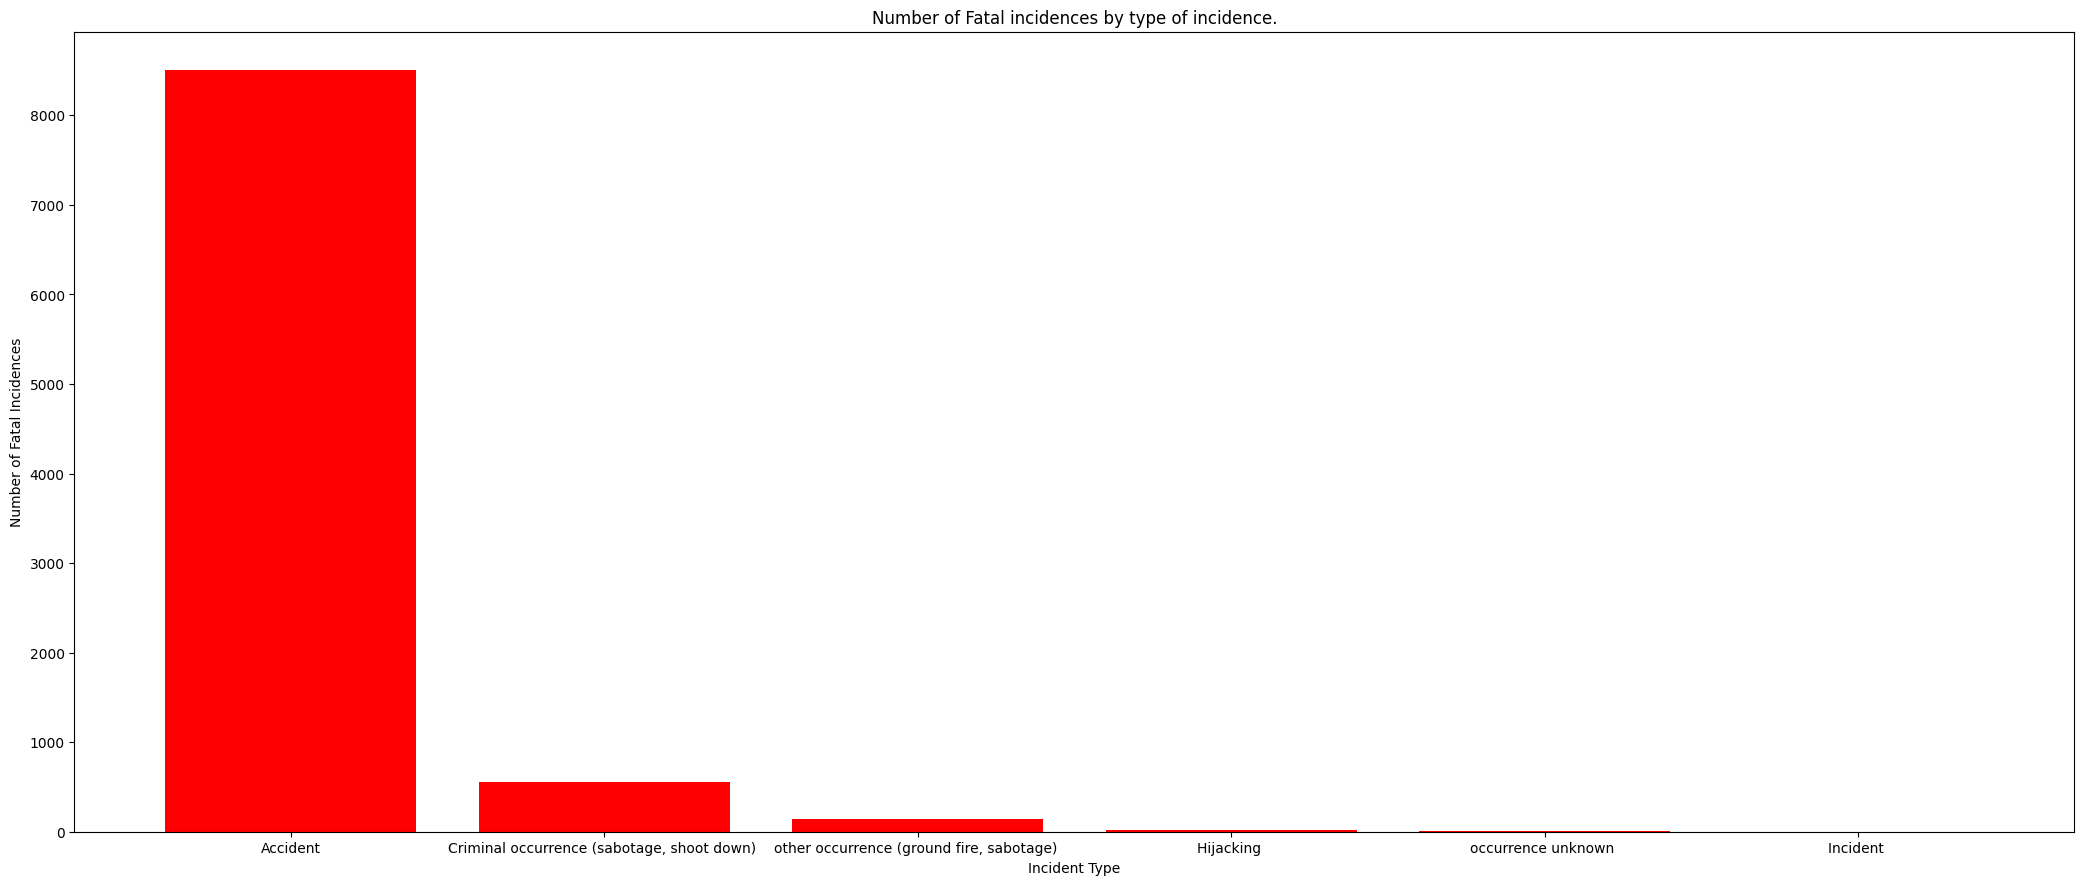

In [142]:
fatal_incident_types = ['Accident', 'Criminal occurrence (sabotage, shoot down) ',
 'other occurrence (ground fire, sabotage) ', 'Hijacking ',
 'occurrence unknown ', 'Incident ']
print(fatal_incident_types)
arg_accident = fatal_accidents['Incident_Type'] == 'Accident '
arg_criminal = fatal_accidents['Incident_Type'] == 'Criminal occurrence (sabotage, shoot down) '
arg_hijack = fatal_accidents['Incident_Type'] == 'Hijacking '
arg_other_ground = fatal_accidents['Incident_Type'] == 'other occurrence (ground fire, sabotage) '
arg_unknown = fatal_accidents['Incident_Type'] == 'occurrence unknown '


fatal_accident = fatal_accidents[arg_accident]
fatal_criminal = fatal_accidents[arg_criminal]
fatal_hijack = fatal_accidents[arg_hijack]
fatal_other_ground = fatal_accidents[arg_other_ground]
fatal_unknown = fatal_accidents[arg_unknown]

fatal_accident_count = len(fatal_accident)
fatal_criminal_count = len(fatal_criminal)
fatal_hijack_count = len(fatal_hijack)
fatal_other_ground_count = len(fatal_other_ground)
fatal_unknown_count = len(fatal_unknown)

fatal_incident_counts = []
fatal_incident_counts.append(fatal_accident_count)
fatal_incident_counts.append(fatal_criminal_count)
fatal_incident_counts.append(fatal_hijack_count)
fatal_incident_counts.append(fatal_other_ground_count)
fatal_incident_counts.append(fatal_unknown_count)
fatal_incident_counts.append(0)

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20,8))
ax = fig.add_axes([0,0,1,1])
incident_types_plot = fatal_incident_types
incident_count_plot = fatal_incident_counts

ax.set_xlabel('Incident Type')
ax.set_ylabel('Number of Fatal Incidences')
ax.set_title('Number of Fatal incidences by type of incidence.')
ax.bar(incident_types_plot,incident_count_plot, color='r')
plt.show()





['Accident ' 'Criminal occurrence (sabotage, shoot down) '
 'other occurrence (ground fire, sabotage) ' 'Hijacking '
 'occurrence unknown ' 'Incident ']


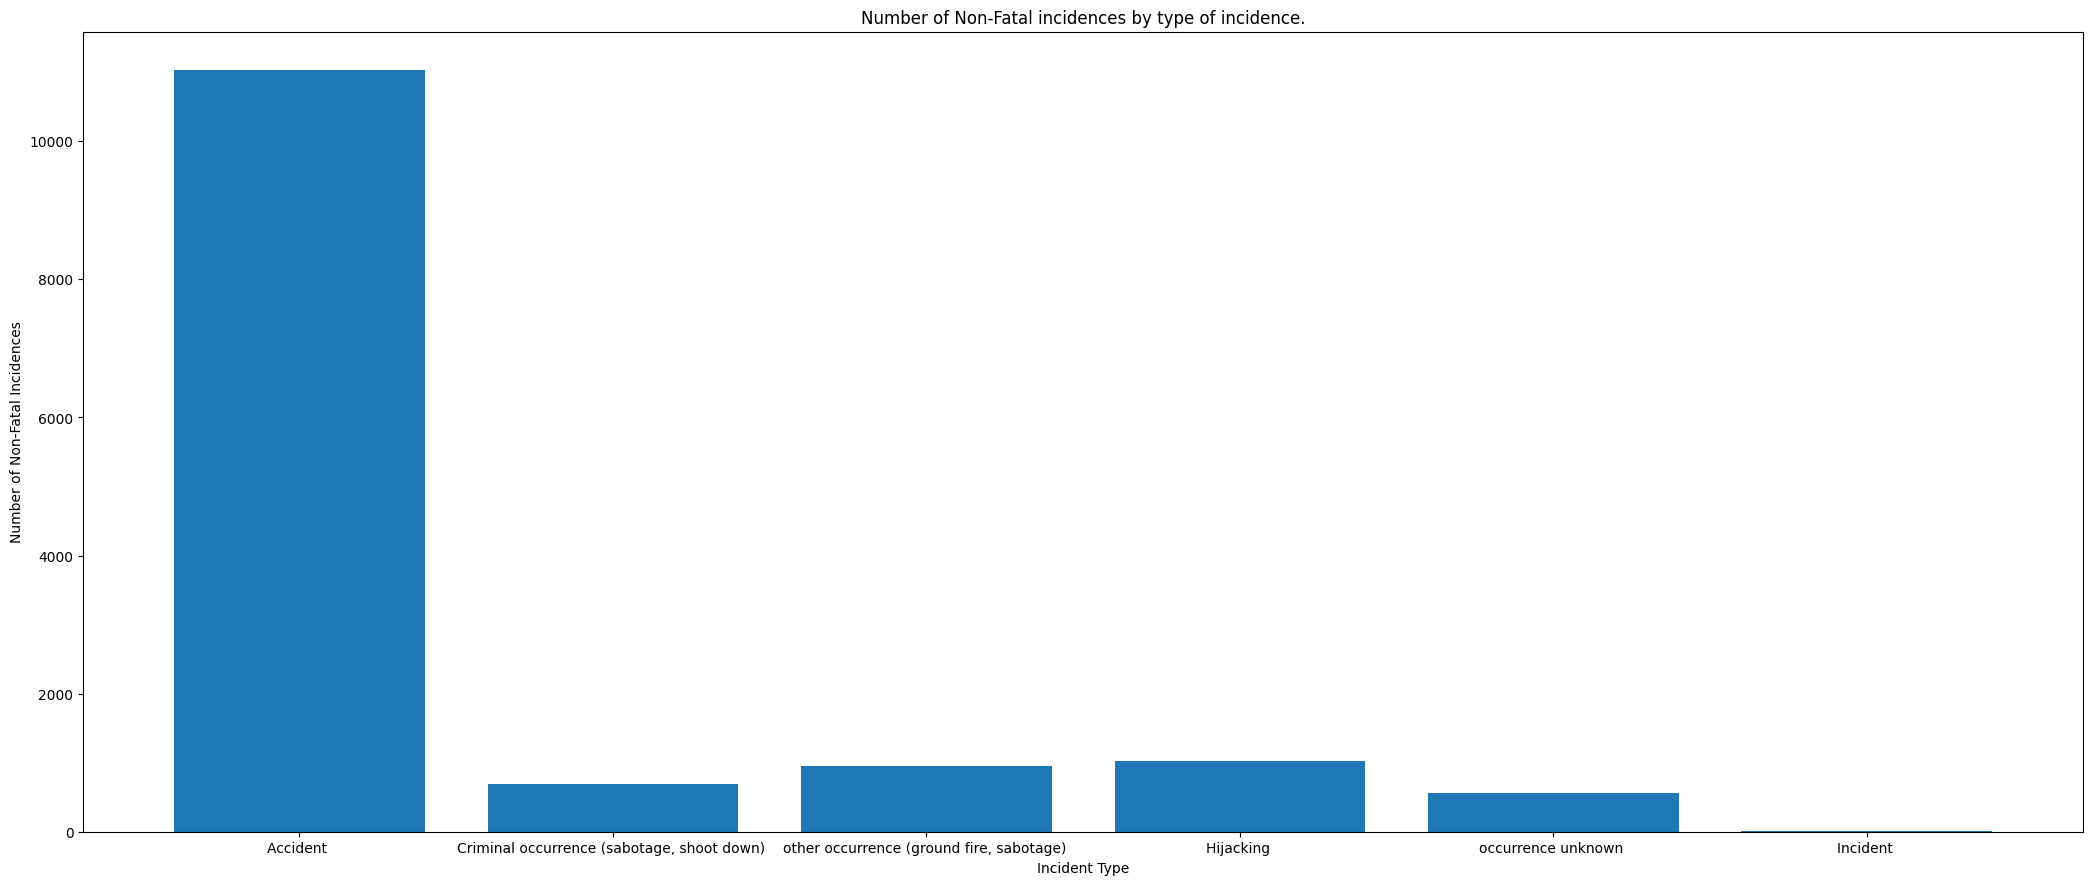

In [90]:
non_fatal_incident_types = non_fatal_accidents['Incident_Type'].unique()
print(non_fatal_incident_types)

arg_accident_nf = non_fatal_accidents['Incident_Type'] == 'Accident '
arg_criminal_nf = non_fatal_accidents['Incident_Type'] == 'Criminal occurrence (sabotage, shoot down) '
arg_hijack_nf = non_fatal_accidents['Incident_Type'] == 'Hijacking '
arg_other_ground_nf = non_fatal_accidents['Incident_Type'] == 'other occurrence (ground fire, sabotage) '
arg_unknown_nf = non_fatal_accidents['Incident_Type'] == 'occurrence unknown '
arg_incident_nf = non_fatal_accidents['Incident_Type'] == 'Incident '

non_fatal_accident = non_fatal_accidents[arg_accident_nf]
non_fatal_criminal = non_fatal_accidents[arg_criminal_nf]
non_fatal_hijack = non_fatal_accidents[arg_hijack_nf]
non_fatal_other_ground = non_fatal_accidents[arg_other_ground_nf]
non_fatal_unknown = non_fatal_accidents[arg_unknown_nf]
non_fatal_incident = non_fatal_accidents[arg_incident_nf]

non_fatal_accident_count = len(non_fatal_accident)
non_fatal_criminal_count = len(non_fatal_criminal)
non_fatal_hijack_count = len(non_fatal_hijack)
non_fatal_other_ground_count = len(non_fatal_other_ground)
non_fatal_unknown_count = len(non_fatal_unknown)
non_fatal_incident_count = len(non_fatal_incident)

non_fatal_incident_counts = []
non_fatal_incident_counts.append(non_fatal_accident_count)
non_fatal_incident_counts.append(non_fatal_criminal_count)
non_fatal_incident_counts.append(non_fatal_hijack_count)
non_fatal_incident_counts.append(non_fatal_other_ground_count)
non_fatal_incident_counts.append(non_fatal_unknown_count)
non_fatal_incident_counts.append(non_fatal_incident_count)

fig = plt.figure(figsize=(20,8))
ax = fig.add_axes([0,0,1,1])
nf_incidence_types_plot = non_fatal_incident_types
nf_incidence_count_plot = non_fatal_incident_counts
ax.set_xlabel('Incident Type')
ax.set_ylabel('Number of Non-Fatal Incidences')
ax.set_title('Number of Non-Fatal incidences by type of incidence.')
ax.bar(non_fatal_incident_types,nf_incidence_count_plot)
plt.show()

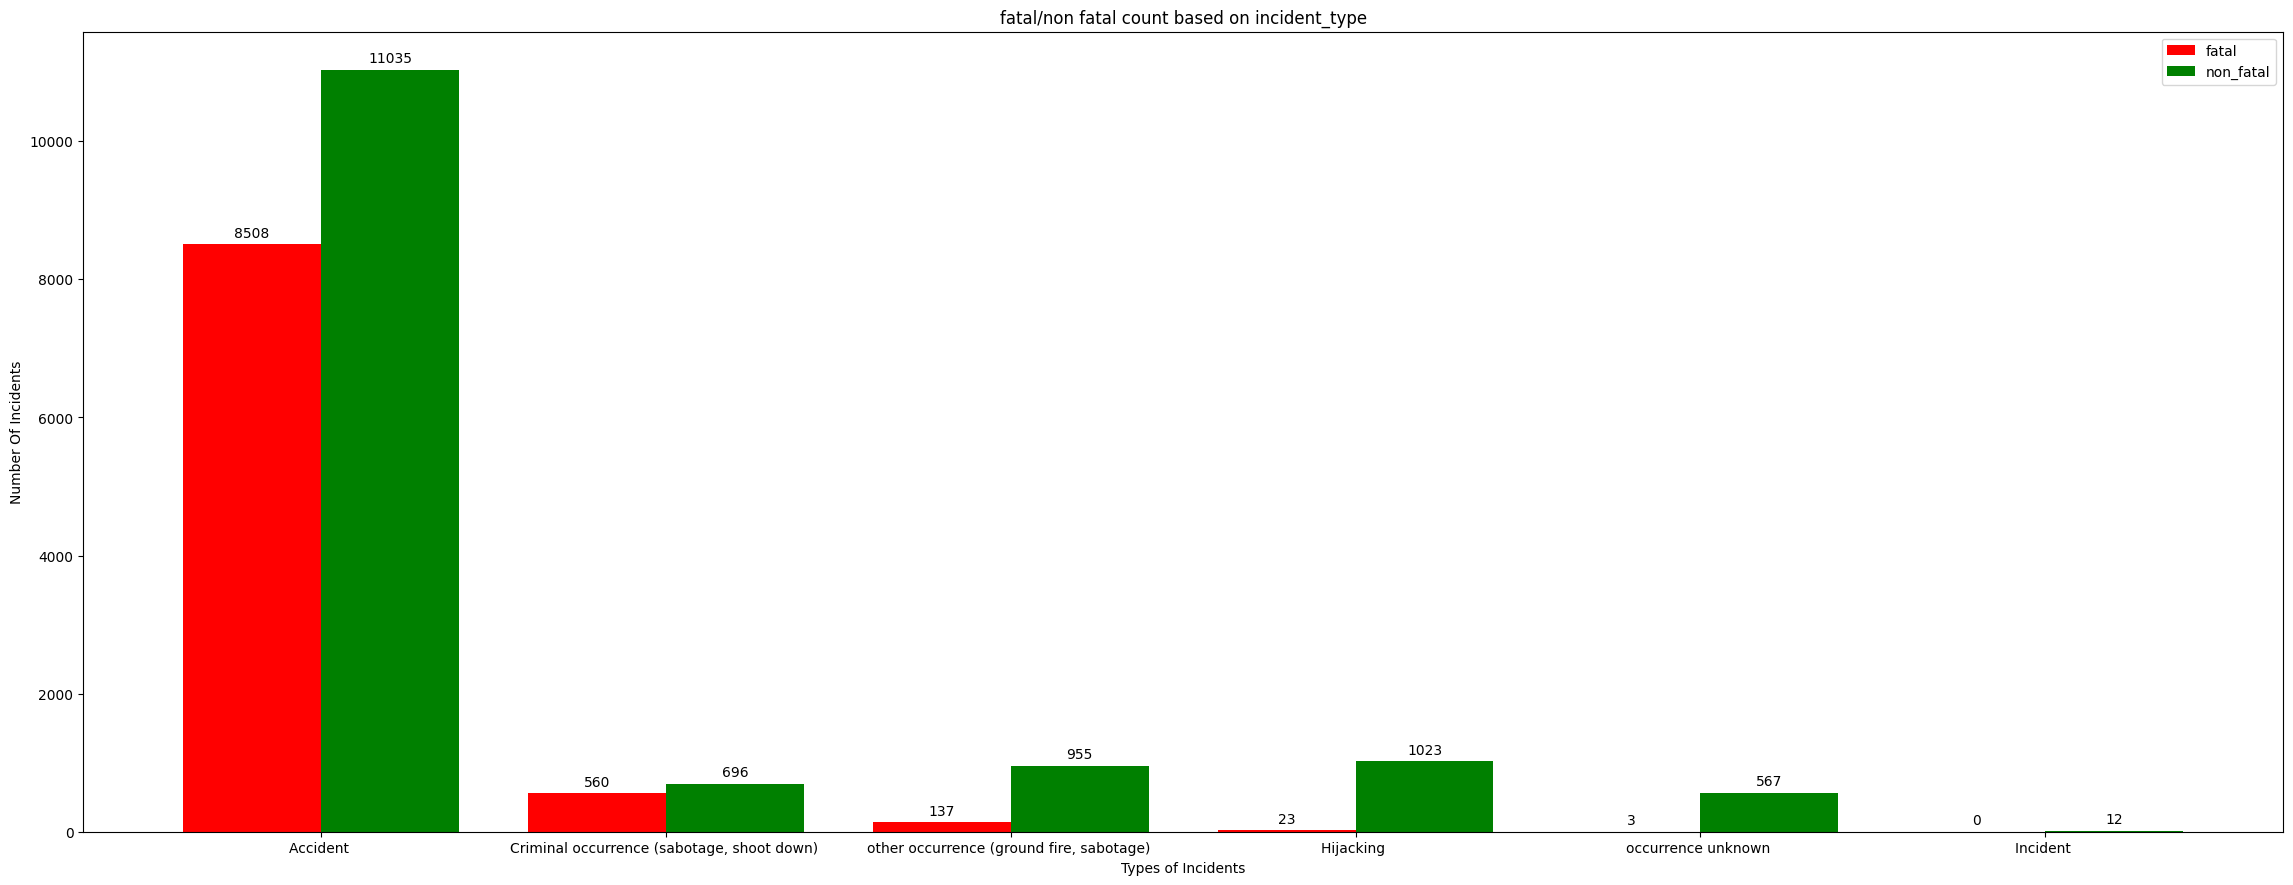

In [140]:
labels = non_fatal_incident_types
width = 0.4
x = np.arange(len(non_fatal_incident_types))
fig = plt.figure(figsize=(22,8))
ax = fig.add_axes([0,0,1,1])

ax.set_ylabel('Number Of Incidents')
ax.set_xlabel('Types of Incidents')
ax.set_title('fatal/non fatal count based on incident_type')
ax.set_xticks(x,labels)

rect_fatal = ax.bar(x - width/2,fatal_incident_counts,0.4,label="fatal",color='r')
non_rect_fatal = ax.bar(x + width/2,non_fatal_incident_counts,0.4,label="non_fatal",color='g')

ax.bar_label(rect_fatal, padding=3)
ax.bar_label(non_rect_fatal, padding=3)
ax.legend()

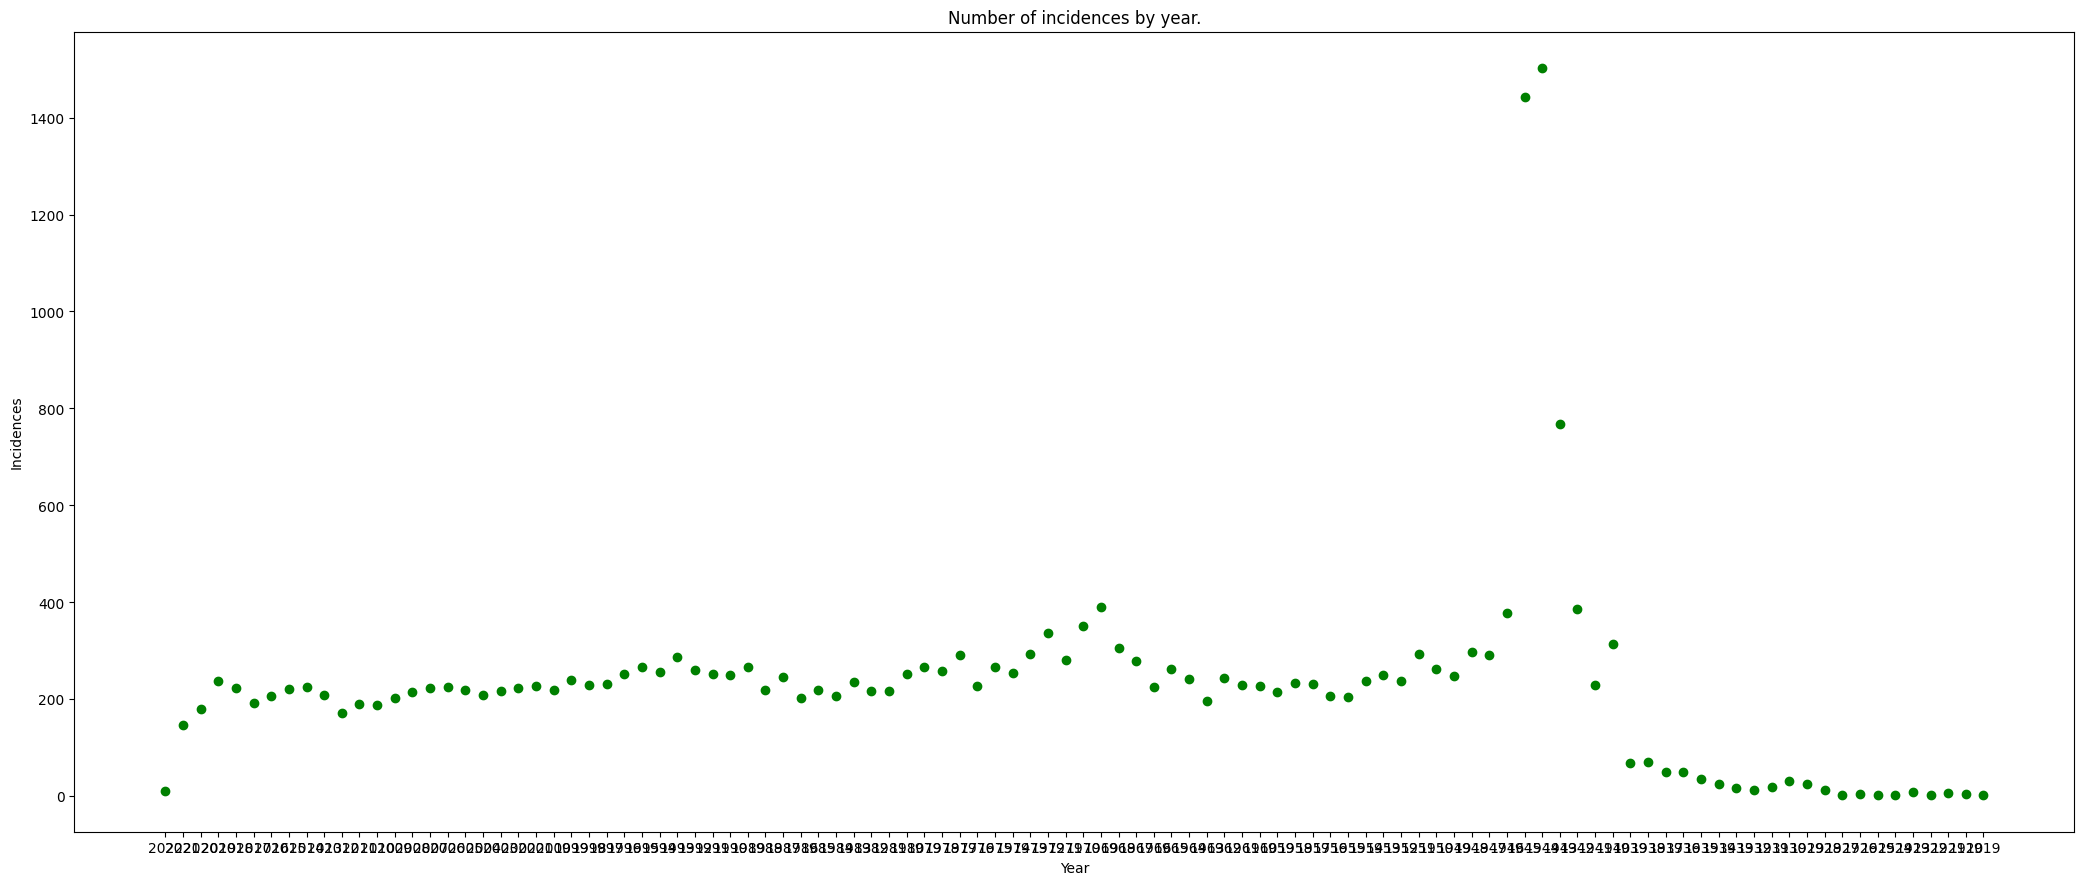

In [92]:
unique_incident_year = drop['Inciddnt_Year'].unique()
most_impacted_year = 0
instances_in_current_year = 0
total_instances_by_year = []

for year in unique_incident_year:
    fatal_year_arg = fatal_accidents['Inciddnt_Year'] == year
    non_fatal_year_arg = non_fatal_accidents['Inciddnt_Year'] == year
    
    fatal_year_incidences = fatal_accidents[fatal_year_arg]
    non_fatal_year_incidences = non_fatal_accidents[non_fatal_year_arg]
    
    total_incidences = len(fatal_year_incidences) + len(non_fatal_year_incidences)
    
    total_instances_by_year.append(total_incidences)

fig=plt.figure(figsize=(20,8))
ax=fig.add_axes([0,0,1,1])
ax.scatter(unique_incident_year, total_instances_by_year, color='g')
ax.set_xlabel('Year')
ax.set_ylabel('Incidences')
ax.set_title('Number of incidences by year.')
plt.show()

There were 1 fatal & 11 non-fatal incidences in 2022
There were 40 fatal & 108 non-fatal incidences in 2021
There were 35 fatal & 145 non-fatal incidences in 2020
There were 52 fatal & 185 non-fatal incidences in 2019
There were 42 fatal & 182 non-fatal incidences in 2018
There were 42 fatal & 150 non-fatal incidences in 2017
There were 45 fatal & 162 non-fatal incidences in 2016
There were 41 fatal & 180 non-fatal incidences in 2015
There were 50 fatal & 175 non-fatal incidences in 2014
There were 56 fatal & 152 non-fatal incidences in 2013
There were 51 fatal & 120 non-fatal incidences in 2012
There were 53 fatal & 137 non-fatal incidences in 2011
There were 51 fatal & 138 non-fatal incidences in 2010
There were 63 fatal & 140 non-fatal incidences in 2009
There were 65 fatal & 150 non-fatal incidences in 2008
There were 60 fatal & 163 non-fatal incidences in 2007
There were 68 fatal & 158 non-fatal incidences in 2006
There were 67 fatal & 153 non-fatal incidences in 2005
There were 6

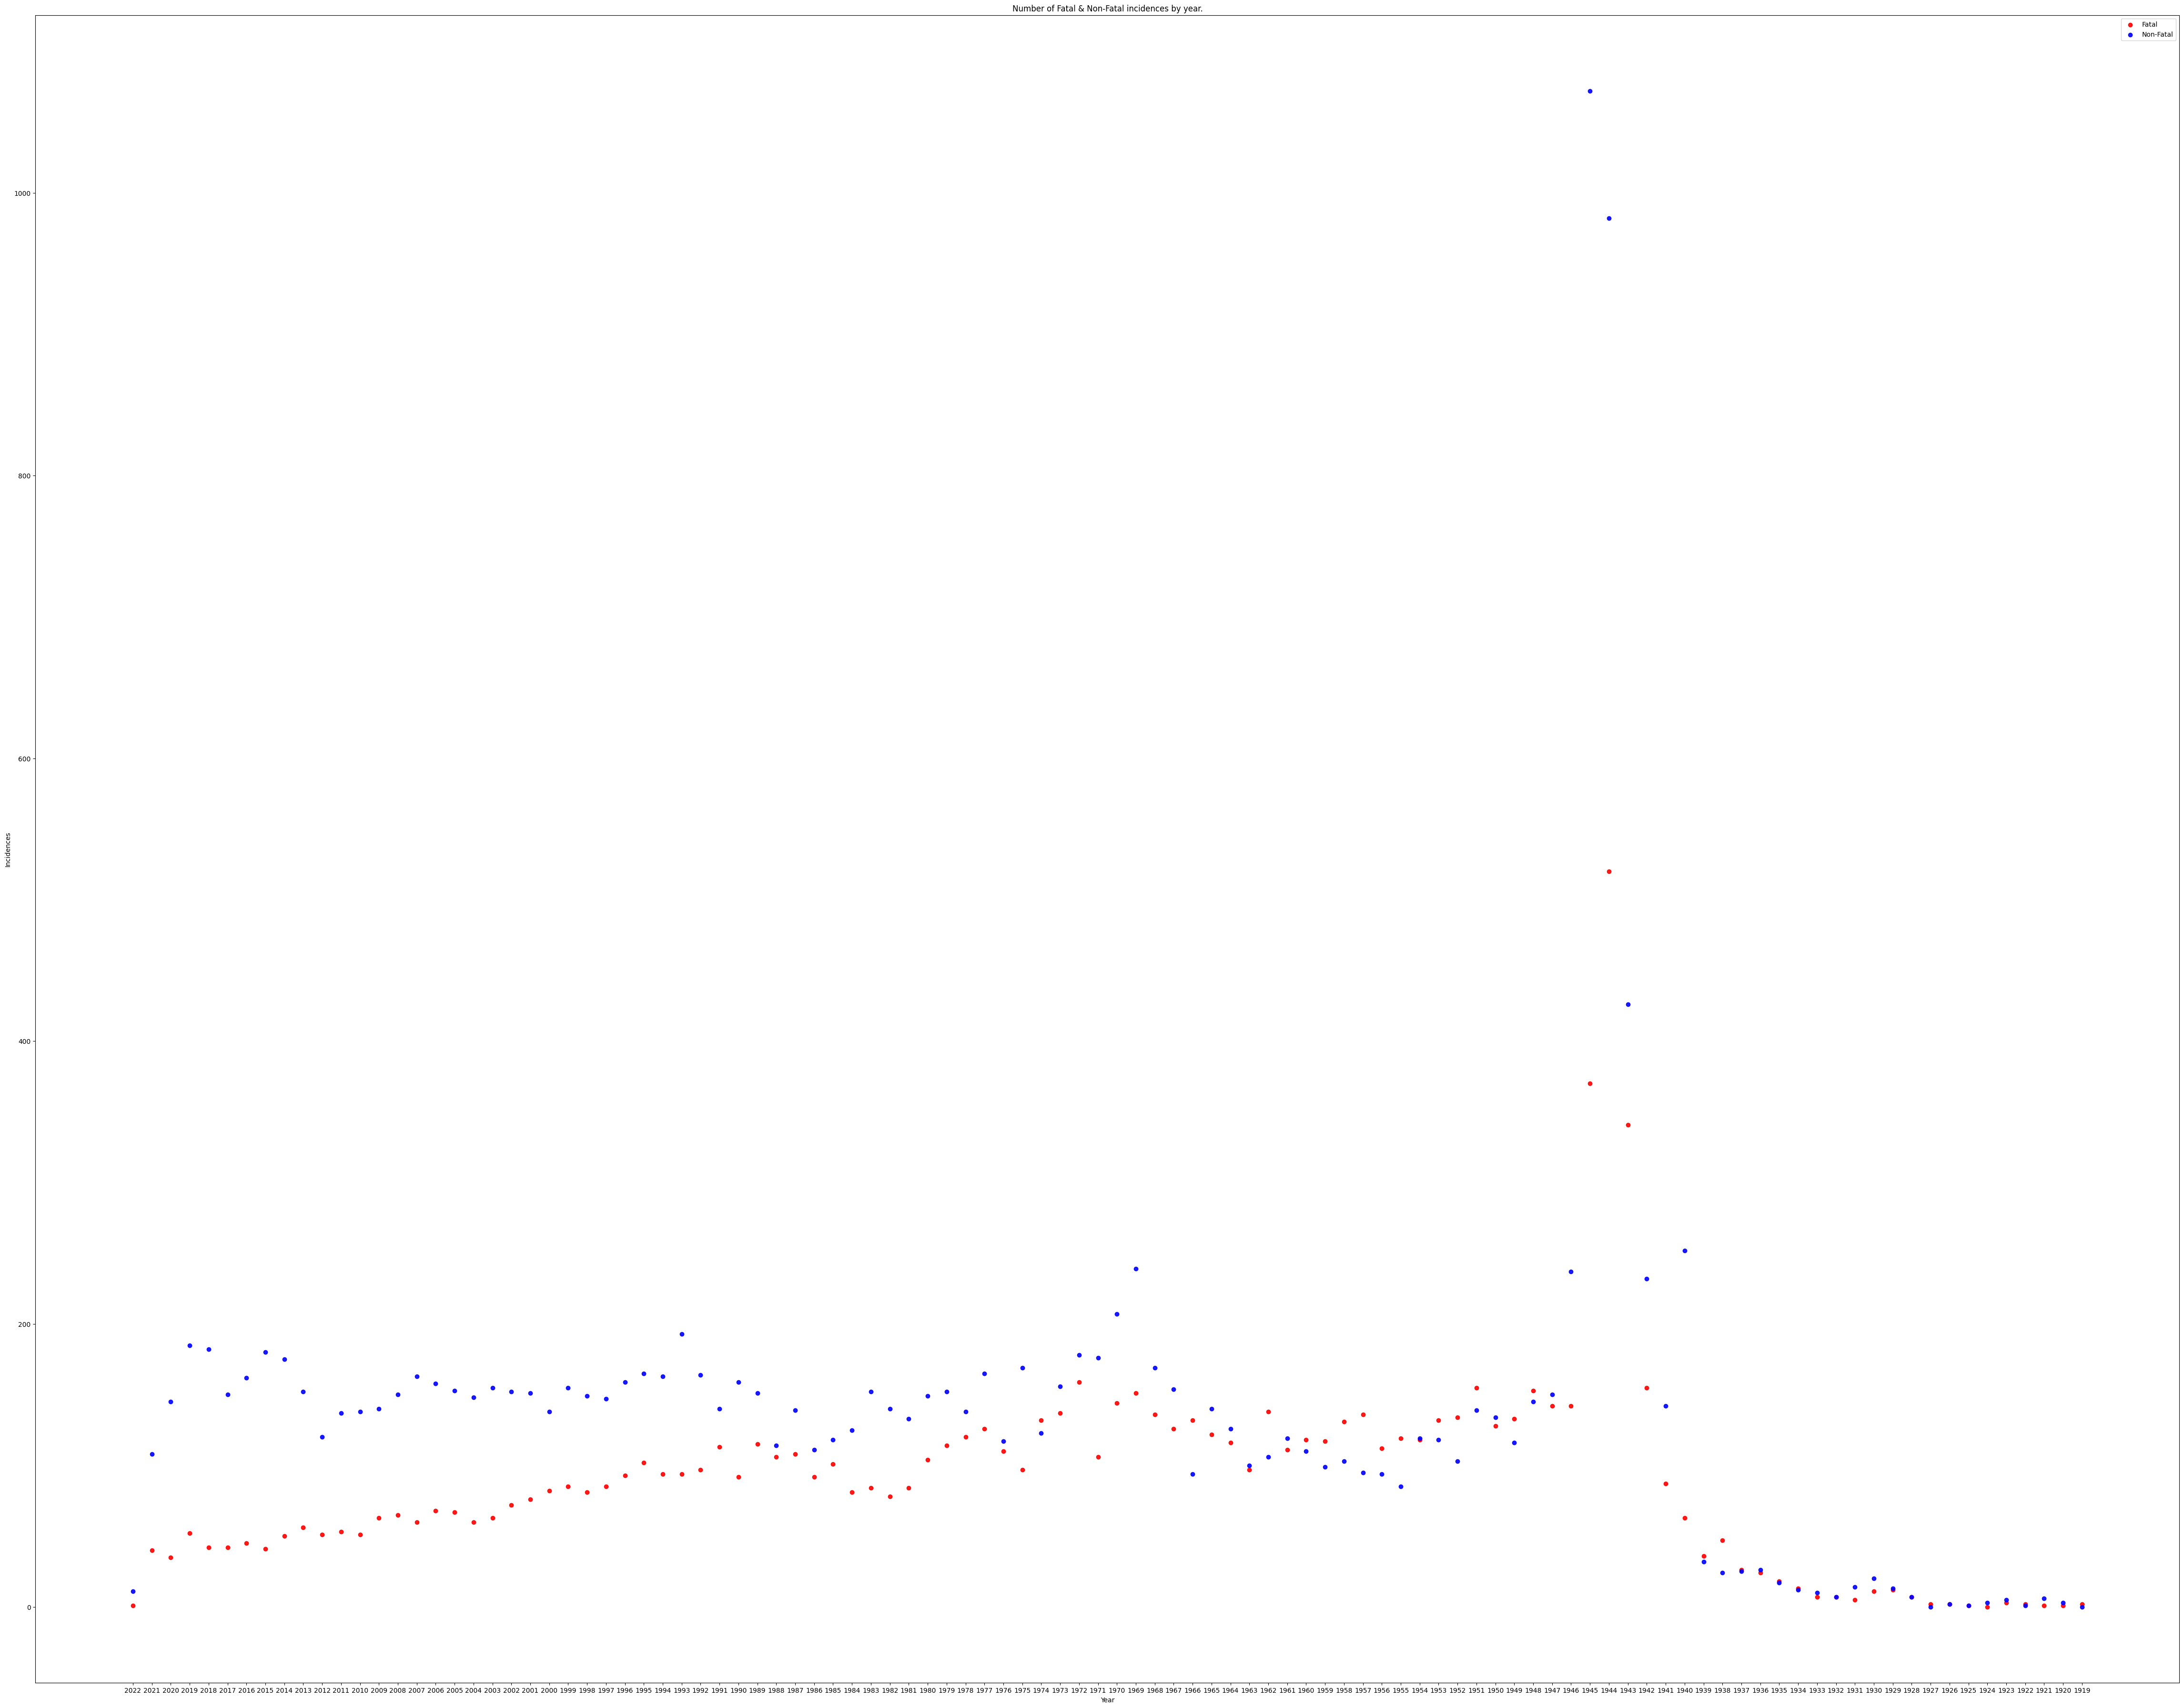

The most impacted year when it comes to incidences is: 1944
2


In [167]:
unique_incident_year = drop['Inciddnt_Year'].unique()
most_impacted_year = 0
instances_in_current_year = 0
fatal_incidences_by_year = []
non_fatal_incidences_by_year = []
for year in unique_incident_year:
    
    fatal_year_arg = fatal_accidents['Inciddnt_Year'] == year
    non_fatal_year_arg = non_fatal_accidents['Inciddnt_Year'] == year
    
    fatal_year_incidences = fatal_accidents[fatal_year_arg]
    non_fatal_year_incidences = non_fatal_accidents[non_fatal_year_arg]
    
    total_incidences = len(fatal_year_incidences) + len(non_fatal_year_incidences)
    if total_incidences > int(instances_in_current_year):
        instances_in_current_year = total_incidences
        most_impacted_year = year
    
    fatal_incidences_by_year.append(len(fatal_year_incidences))
    non_fatal_incidences_by_year.append(len(non_fatal_year_incidences))
    print("There were " + str(len(fatal_year_incidences)) + ' fatal & ' + str(len(non_fatal_year_incidences)) + " non-fatal incidences in " + str(year))
    
fig=plt.figure(figsize=(45,35))
ax=fig.add_axes([0,0,1,1])
ax.scatter(unique_incident_year, fatal_incidences_by_year, color='r', label="Fatal",alpha=0.9)
ax.scatter(unique_incident_year, non_fatal_incidences_by_year, color='b', label="Non-Fatal",alpha=0.9)
ax.set_xlabel('Year')
ax.set_ylabel('Incidences')
ax.set_title('Number of Fatal & Non-Fatal incidences by year.')
ax.legend()
plt.show()

print("The most impacted year when it comes to incidences is: " + str(most_impacted_year))
print(total_incidences)

In [94]:
print(non_fatal_hijack_count)

955


In [95]:
len(arg_hijack_nf)

14288

In [96]:
len(arg_hijack)

9231

In [97]:
print(fatal_hijack_count)

137


['Domestic Non Scheduled Passenger' 'Domestic Scheduled Passenger' 'Cargo'
 'Illegal Flight' 'Military' 'Unknown' 'Passenger' 'Ambulance' 'Test'
 'Training' '-' 'Agricultural' 'Ferry/positioning' 'Private' 'Executive'
 'Parachuting' 'Fire fighting' 'Aerial Work (Calibration, Photo)'
 'International Scheduled Passenger' 'Survey/research'
 "Int'l Non Scheduled Passenger" 'Official state flight' 'Demonstration'
 'Non Scheduled Passenger' 'Scheduled Passenger']
There were 835 incidences that fell under the following nature: Domestic Non Scheduled Passenger

There were 4004 incidences that fell under the following nature: Domestic Scheduled Passenger

There were 2085 incidences that fell under the following nature: Cargo

There were 252 incidences that fell under the following nature: Illegal Flight

There were 8403 incidences that fell under the following nature: Military

There were 2163 incidences that fell under the following nature: Unknown

There were 265 incidences that fell under th

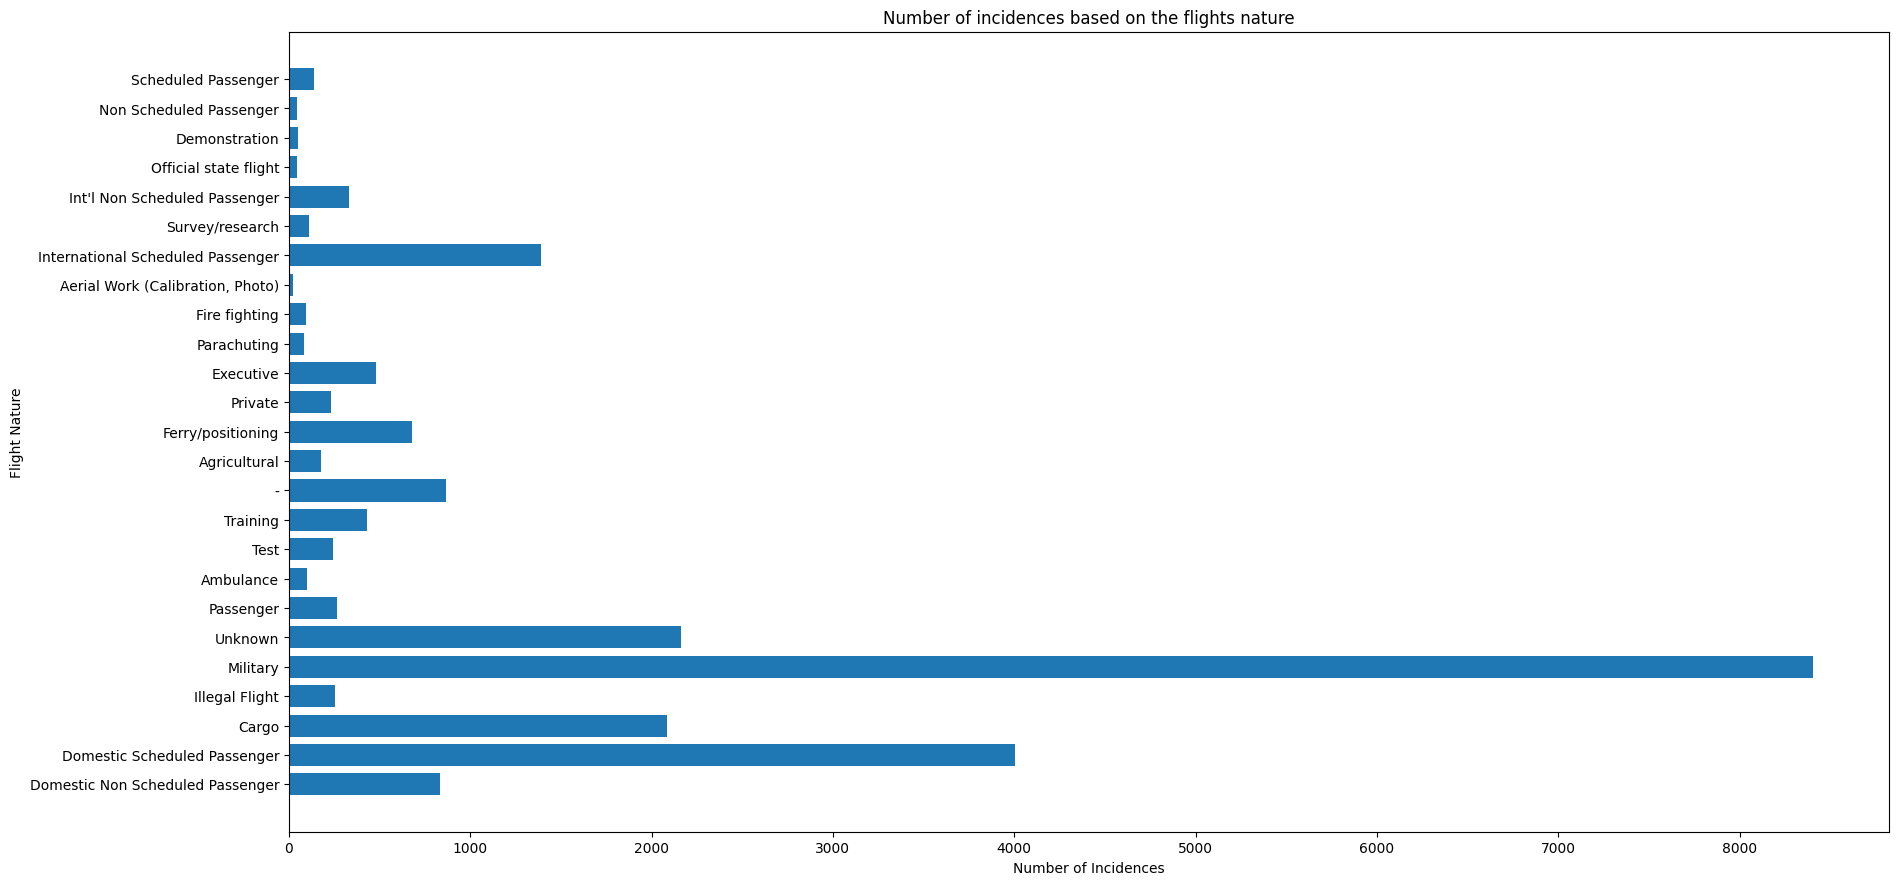

In [168]:
unique_flight_nature = drop['Aircaft_Nature'].unique()
print(unique_flight_nature)
unique_incident_counter = []
for flight_nature in unique_flight_nature:
    flight_nature_arg = drop['Aircaft_Nature'] == flight_nature
    flight_nature_dataset = drop[flight_nature_arg]
    flight_nature_count = len(flight_nature_dataset)
    unique_incident_counter.append(flight_nature_count)
    print('There were ' + str(flight_nature_count) + ' incidences that fell under the following nature: ' + str(flight_nature) )
    print('')
labels = unique_incident_counter
width = 0.75
x = np.arange(len(unique_incident_counter))
fig=plt.figure(figsize=(16,8))
ax=fig.add_axes([0,0,1,1])
plt.barh(unique_flight_nature, unique_incident_counter,width)
plt.title('Number of incidences based on the flights nature')
plt.ylabel('Flight Nature')
plt.xlabel('Number of Incidences')
plt.show()

In [177]:
pd.set_option('display.max_columns', None)
military_flight_arg = drop['Aircaft_Nature'] == 'Military'
military_flight_dataset = drop[military_flight_arg]
military_incidence_count = len(military_flight_dataset)
military_flight_type = military_flight_dataset['Aircaft_Damage_Type'].unique()
military_flight_type_couts = []

for incident_type in military_flight_type:
    military_type_arg = military_flight_dataset['Aircaft_Damage_Type'] == incident_type
    military_type_dataset = military_flight_dataset[military_type_arg]
    military_flight_count = len(military_type_dataset)
    military_flight_type_couts.append(len(military_type_dataset))
    print('There were ' + str( military_flight_count ) + ' incidences that fell under the following nature: ' + str(incident_type) )

There were 189 incidences that fell under the following nature: Substantial
There were 7494 incidences that fell under the following nature: Damaged beyond repair
There were 428 incidences that fell under the following nature: Destroyed
There were 7 incidences that fell under the following nature: Unknown
There were 270 incidences that fell under the following nature: Missing
There were 8 incidences that fell under the following nature: Minor
There were 0 incidences that fell under the following nature: nan


8403
7494
2


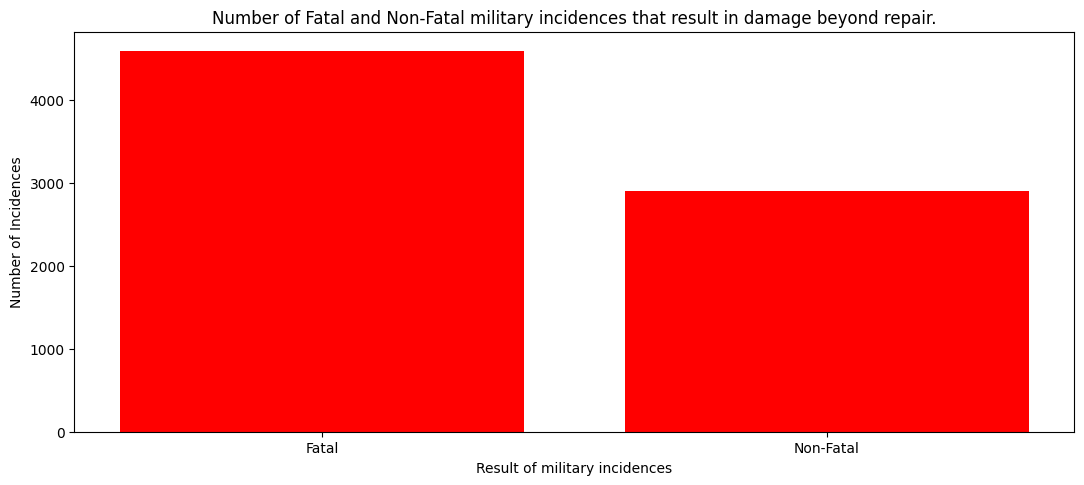

In [162]:
damaged_beyond_repair_military_incidences_arg = military_flight_dataset['Aircaft_Damage_Type'] == 'Damaged beyond repair'
damaged_beyond_repair_military_incidences = military_flight_dataset[damaged_beyond_repair_military_incidences_arg]

fatal_military_incidencs_results_in_dbr_arg = damaged_beyond_repair_military_incidences['Fatalities'] == 0
non_fatal_military_incidencs_results_in_dbr_arg = damaged_beyond_repair_military_incidences['Fatalities'] > 0

fatal_military_incidencs_results_in_dbr = damaged_beyond_repair_military_incidences[fatal_military_incidencs_results_in_dbr_arg]
non_fatal_military_incidencs_results_in_dbr = damaged_beyond_repair_military_incidences[non_fatal_military_incidencs_results_in_dbr_arg]

incidence_types_f_nf = ['Fatal', 'Non-Fatal']
incidence_tyles_f_nf_count = [len(fatal_military_incidencs_results_in_dbr), len(non_fatal_military_incidencs_results_in_dbr)]
print(len(damaged_beyond_repair_military_incidences_arg))
print(len(fatal_military_incidencs_results_in_dbr_arg))
print(len(incidence_tyles_f_nf_count))
fig = plt.figure(figsize=(10,4))
ax = fig.add_axes([0,0,1,1])
incidence_types_f_nf_plot = incidence_types_f_nf
incidence_count_f_nf_plot = incidence_tyles_f_nf_count
ax.set_xlabel('Result of military incidences')
ax.set_ylabel('Number of Incidences')
ax.set_title('Number of Fatal and Non-Fatal military incidences that result in damage beyond repair.')
ax.bar(incidence_types_f_nf_plot, incidence_count_f_nf_plot, color='r')
plt.show()

In [134]:
fatal_military_incidencs_results_in_dbr = damaged_beyond_repair_military_incidences[fatal_military_incidencs_results_in_dbr_arg]
non_fatal_military_incidencs_results_in_dbr = damaged_beyond_repair_military_incidences[non_fatal_military_incidencs_results_in_dbr_arg]
f_military_dbr_phase_unique = fatal_military_incidencs_results_in_dbr['Aircraft_Phase'].unique()
nf_military_dbr_phase_unique = non_fatal_military_incidencs_results_in_dbr['Aircraft_Phase'].unique()

f_military_phase_count = []

for phase in f_military_dbr_phase_unique:
    f_military_dbr_arg = fatal_military_incidencs_results_in_dbr['Aircraft_Phase'] == phase
    f_military_dbr = fatal_military_incidencs_results_in_dbr[f_military_dbr_arg]
    f_military_dbr_length = len(f_military_dbr)
    f_military_phase_count.append(f_military_dbr_length)
    
nf_military_phase_count = []

for phase in nf_military_dbr_phase_unique:
    nf_military_dbr_arg = non_fatal_military_incidencs_results_in_dbr['Aircraft_Phase'] == phase
    nf_military_dbr = non_fatal_military_incidencs_results_in_dbr[nf_military_dbr_arg]
    nf_military_dbr_length = len(nf_military_dbr)
    nf_military_phase_count.append(nf_military_dbr_length)

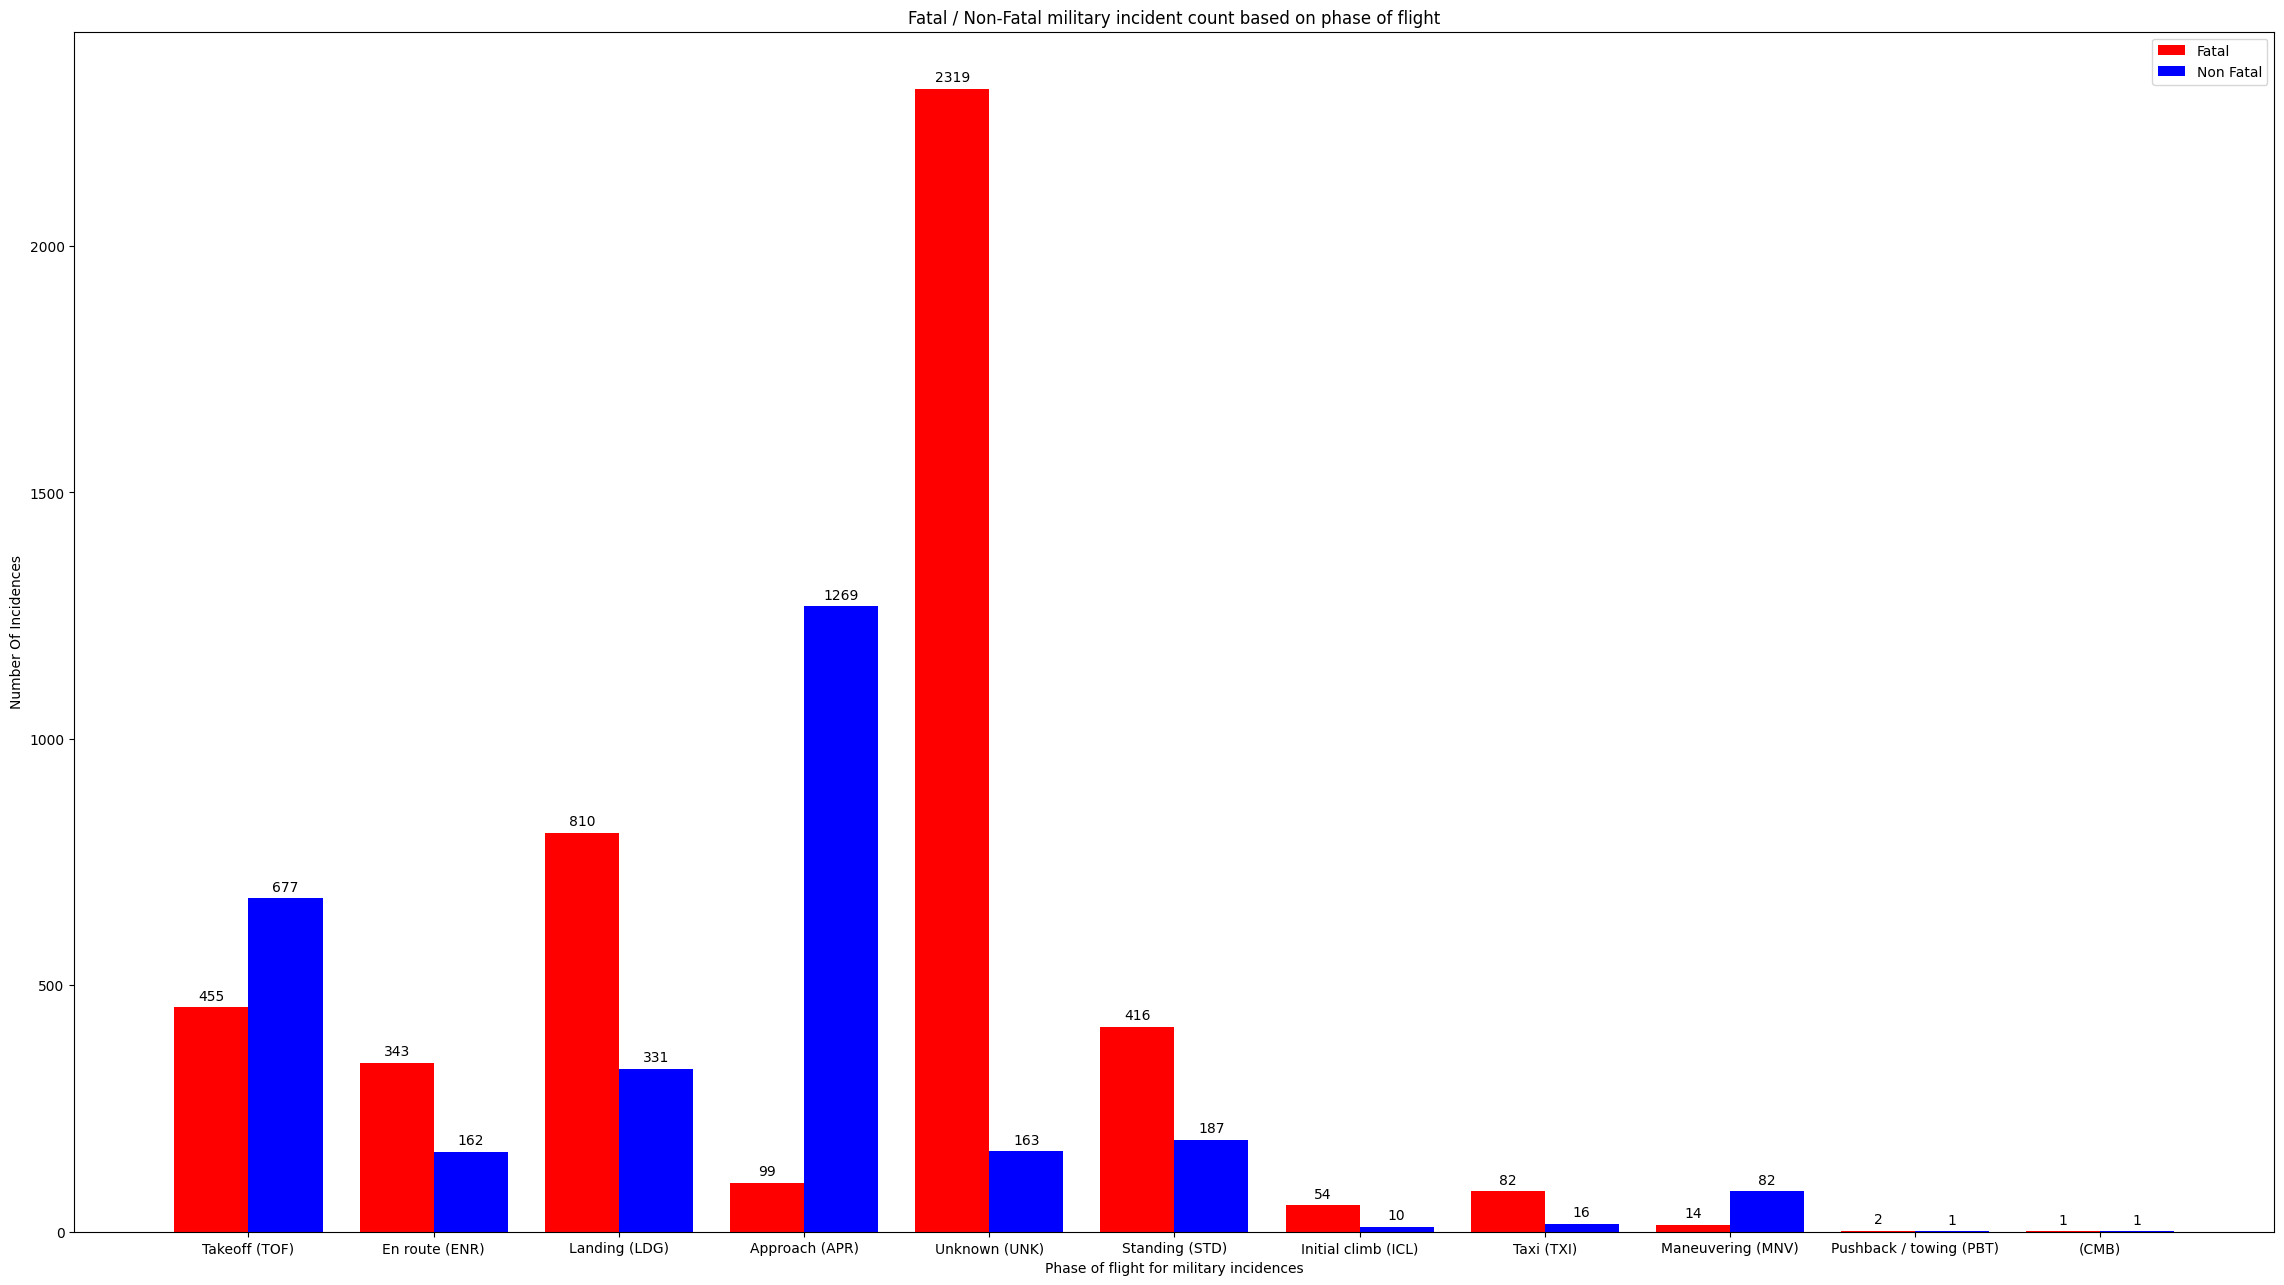

In [135]:
labels = f_military_dbr_phase_unique
width = 0.4

x = np.arange(len(f_military_dbr_phase_unique))
fig = plt.figure(figsize=(22,12))
ax = fig.add_axes([0,0,1,1])

ax.set_ylabel('Number Of Incidences')
ax.set_xlabel('Phase of flight for military incidences')
ax.set_title('Fatal / Non-Fatal military incident count based on phase of flight')
ax.set_xticks(x, labels)

rect_fatal = ax.bar(x - width/2, f_military_phase_count, .4, label="Fatal", color='r')
rect_non_fatal = ax.bar(x + width/2, nf_military_phase_count, .4, label="Non Fatal", color='b')

ax.bar_label(rect_fatal, padding=3)
ax.bar_label(rect_non_fatal, padding=3)
ax.legend()

plt.show()